# Projet Gestion de la Concurrence

**Kévin** **Ushaka**

**Denis** **ADANLEHOUSSI**










Il existe plusieures modules qui prennent en charge l'utilisation des threads en Python: _thread, 
multiprocessing, threading, asyncio.

Le module _thread traite un thread comme une fonction, tandis que les modules multiprocessing, threading et asyncio sont 
implémentés de manière orientée objet, c'est-à-dire que chaque processus/thread correspond à un objet.



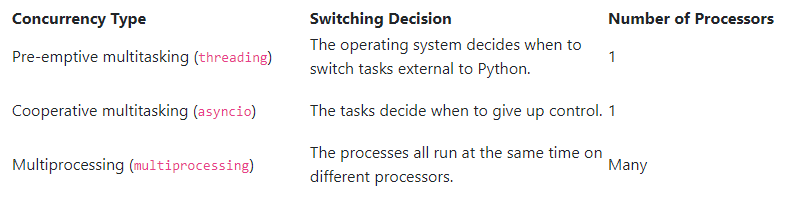

Quand on fait du multi-threading en python, 2 threads ne peuvent pas exécuter du code python en même temps à cause du Global Interpreter Lock. L'exécution simultanée de plusieurs tâches nécessite une implémentation non standard de Python
ou l'utilisation du multiprocessing qui entraîne une surcharge supplémentaire.

Quand on fait du multi-processing, c'est plus lourd, car il faut créer des processus, et la communication entre process est plus difficile car ils ne partagent pas la mémoire.

#Pourquoi GIL?
Python utilise le comptage de références pour la gestion de la mémoire. 
Cela signifie que les objets créés en Python ont une variable de comptage de références qui assure 
le suivi du nombre de références pointant vers l'objet. 
Lorsque ce décompte atteint zéro, la mémoire occupée par l'objet est libérée.

Le problème est que cette variable de comptage de référence nécessite une protection contre les 
conditions de concurrence où deux threads augmentent ou diminuent simultanément sa valeur. 
Cela peut provoquer une fuite de mémoire qui n'est jamais libérée ouune libération incorrecte de la mémoire 
alors qu'une référence à cet objet existe toujours. 

# _thread

#_thread
Il est possible d'exécuter des fonctions dans un thread séparé avec le module Thread. 

thread.start_new_thread (fonction, args [, kwargs])

Cette méthode démarre un nouveau thread et renvoie son identifiant. 
Le thread exécute la fonction avec l'argument list args. L'argument kwargs facultatif spécifie un dictionnaire 
d'arguments de mot-clé. Lorsque la fonction revient, le thread se ferme silencieusement. Lorsque la fonction se termine 
avec une exception non gérée, une trace de pile est imprimée, puis le thread se termine.

In [2]:
from _thread import start_new_thread
import time

def thread_function(name):
    print("Thread " +str(name)+ ": starting.")
    time.sleep(2)
    print("Thread " +str(name)+": finishing.")

_thread.
start_new_thread(thread_function,(99,))
start_new_thread(thread_function,(999,))
start_new_thread(thread_function,(1733,))

print("Done.")

Done.
Thread 99: starting.
Thread 999: starting.
Thread 1733: starting.
Thread 99: finishing.
Thread 999: finishing.
Thread 1733: finishing.


# threading

Le module threading fournit une API de fils d'exécution de haut niveau, 
plus facile à utiliser et construite à partir de ce module.

Pour implémenter un nouveau thread à l'aide du module de threading,on doit-

Définir une nouvelle sous-classe de la classe Thread.

Override la méthode __init __ (self [, args]) pour ajouter des arguments supplémentaires.

Override la méthode run (self [, args]) pour implémenter ce que le thread doit faire au démarrage.

In [7]:
import threading
import time

exitFlag = 0

class myThread (threading.Thread):
   def __init__(self, threadID, name, counter):
      threading.Thread.__init__(self)
      self.threadID = threadID
      self.name = name
      self.counter = counter
   def run(self):
      print ("Starting " + self.name)
      print_time(self.name, 5, self.counter)
      print ("Exiting " + self.name)

def print_time(threadName, counter, delay):
   while counter:
      if exitFlag:
         threadName.exit()
      time.sleep(delay)
      print (threadName + time.ctime(time.time()))
      counter -= 1

# Create new threads
thread1 = myThread(1, "Thread-1", 1)
thread2 = myThread(2, "Thread-2", 2)

# Start new Threads
thread1.start()
thread2.start()

print ("Exiting Main Thread")

Starting Thread-1
Starting Thread-2Exiting Main Thread

Thread-2Thu Sep 17 16:16:56 2020
Thread-1Thu Sep 17 16:16:56 2020
Thread-2Thu Sep 17 16:16:56 2020


# multiprocessing

Le module multiprocessing permet de tirer pleinement parti de plusieurs processeurs sur une machine donnée. L'API utilisée est similaire au module de threading classique.
Pour créer un second processus, il faut instancier un objet Process avec une fonction cible et appeler start () 
pour le laisser commencer à fonctionner.
Le guide de style multiprocessing Python recommande de placer le code multiprocesseur dans l'idiome __name__ == '__main__'. Cela est dû à la façon dont les processus sont créés sous Windows. Le but est d'éviter la boucle sans fin des générations de processus.

In [3]:
import multiprocessing

def worker(num):
    print ('Worker:'+ str(num))
    return

if __name__ == '__main__':
    jobs = []
    for i in range(5):
        p = multiprocessing.Process(target=worker, args=(i,))
        jobs.append(p)
        p.start()

Par défaut, le programme principal ne se fermera pas tant que tous les enfants ne seront pas sortis. 

Un thread daemon s'arrêtera immédiatement lorsque le programme se fermera. 
Le thread daemon est un thread qui s'exécute en arrière-plan sans se soucier de l'arrêter.

Un programme exécutant des threads qui ne sont pas des daemon attendra 
que ces threads se terminent avant de se terminer. Cependant, les threads qui sont des daemons 
sont simplement tués où qu'ils soient lorsque le programme se termine.

Pour marquer un processus comme un daemon, il faut définir son attribut de démon avec une valeur booléenne. La valeur par défaut est que les processus ne sont pas des daemon, donc passer True active le mode daemon

In [10]:
import multiprocessing
import time
import sys
import daemon
import non_daemon

if __name__ == '__main__':
    d = multiprocessing.Process(name='daemon', target=daemon)
    d.daemon = True

    n = multiprocessing.Process(name='non-daemon', target=non_daemon)
    n.daemon = False

    d.start()
    time.sleep(1)
    n.start()

ModuleNotFoundError: ignored

# **asyncio**



Le concept général de asyncio est qu’un seul objet Python, appelé la boucle d’événements, contrôle comment et quand chaque tâche est exécutée. La boucle d’événements est consciente de chaque tâche et sait dans quel état elle se trouve. En réalité, il existe de nombreux états dans lesquels les tâches pourraient être mais nous allons dans un souci de simplicité supposer qu'il n'y a que deux états.

L’état prêt indique qu’une tâche a du travail à faire et est prête à être exécutée, et l’état d’attente signifie que la tâche attend que quelque chose externe se termine (une opération réseau par exemple).

La boucle d’événements simplifiée gère deux listes de tâches, une pour chacun de ces états. Il sélectionne l’une des tâches prêtes et la redémarre. Cette tâche est sous contrôle complet jusqu’à ce qu’elle remette en coopération le contrôle à la boucle d’événements.

Lorsque la tâche en cours d’exécution redonne le contrôle à la boucle d’événements, la boucle d’événements place cette tâche dans la liste prête ou en attente, puis passe en revue chacune des tâches de la liste d’attente pour voir si elle est devenue prête par une opération d’E/S achèvement. Et ainsi de suite jusqu'a la fin de l'execution du programme.

In [23]:
#!/usr/bin/env python3
# countasync.py

import asyncio

async def count():
    print("One")
    await asyncio.sleep(1)
    print("Two")

async def main():
    await asyncio.gather(count(), count(), count())

if __name__ == "__main__":
    import time
    s = time.perf_counter()
    loop = asyncio.get_event_loop()
    loop.run_until_complete(main())
    elapsed = time.perf_counter() - s
    print(f"{__file__} executed in {elapsed:0.2f} seconds.")

RuntimeError: ignored

One
One
One
